# Systemy uczące się - Zad. dom. 11: Algorytm oczekiwanie-maksymalizacja

### Autor rozwiązania
Uzupełnij poniższe informacje umieszczając swoje imię i nazwisko oraz numer indeksu:

In [1]:
import numpy as np

NAME = "Wojciech Kot"
ID = "151879"

### Ćwiczenie 1 - implementacja k-means
Wygeneruj zbiór danych

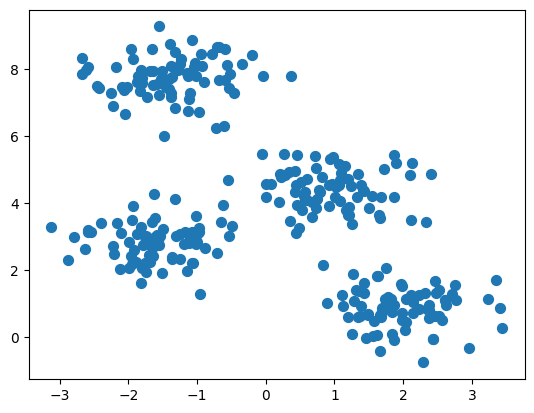

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=4,
                  cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50);

Algorytm k-średnich, zaraz po inicjalizacji początkowych wartości centroidów, składa się z 2 podstawowych, powtarzanych iteracyjnie kroków:
- *expectation* - przypisanie każdego elementu zbiory danych do najbliższego centroidu
- *maximization* - aktualizacja centroidów. Centroid jest wyznaczany jako średnia arytmetyczna po wszystkich przypisanych do niego punktach

Zaimplementuj ten algorytm. W implementacji może być pomocna funkcja `pairwise_distances_argmin` [[dokumentacja]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html)

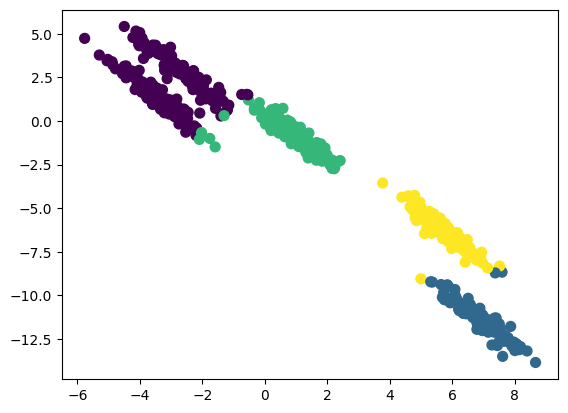

In [22]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(x: np.ndarray, k: int, n_iter: int = 100) -> np.ndarray:
    """Znajduje skupienia algorytmem k-średnich

    Na wyjście zwracany jest wektor zawierający przypisania każdego elementu z x do skupienia
    np. [0,1,1] dla 3-elementowego X i k=2 oznacza że pierwszy element należy
    do grupy pierwszej, a element drugi i trzeci należą do grupy drugiej.

    Arguments:
        x (np.ndarray): zbiór danych
        k (int): liczba szukanych grup

    Returns:
        np.ndarray: wektor zawierający przypisania każdego elementu z x do skupienia
    """
    # n_iter dodane

    rng = np.random.RandomState()
    i = rng.permutation(x.shape[0])[:k]
    centroids = x[i]

    for _ in range(n_iter):
        # Przypisujemy każdy punkt do najbliższego centroidu
        labels = pairwise_distances_argmin(x, centroids)

        # Przeliczamy centroidy jako średnie punktów w danym skupieniu
        new_centroids = np.array([
            x[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
            for i in range(k)
        ])

        # Jeśli centroidy się nie zmieniły – kończymy
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids


    return labels


labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Przetestuj działanie metody dla innych danych:
```
from sklearn.datasets import make_moons, make_circles
X, _ = make_moons(200, noise=.05, random_state=0)
```
oraz
```
X,_ = make_circles(n_samples=1000, factor=0.3, noise=0.1)
```
czy algorytm k-średnich potrafi je zgrupować w sposób zgodny z oczekiwaniami? Jakie rodzaje kształtów potrafi wykrywać algorytm k-średnich?


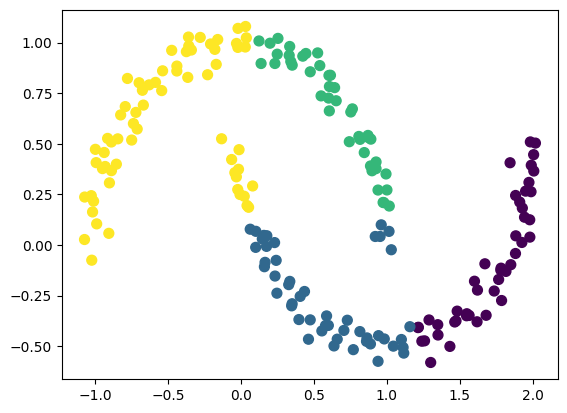

In [9]:
from sklearn.datasets import make_moons, make_circles
X, _ = make_moons(200, noise=.05, random_state=0)

labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

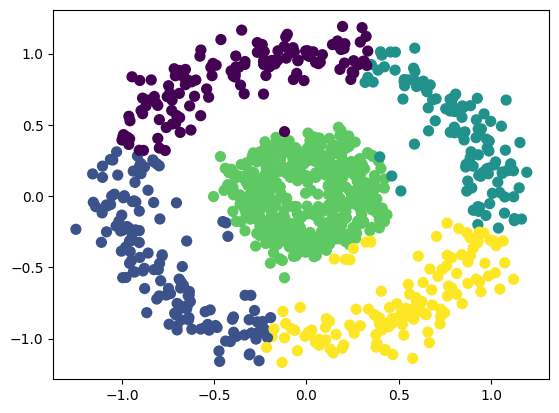

In [12]:
X,_ = make_circles(n_samples=1000, factor=0.3, noise=0.1)

labels = find_clusters(X, 5)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

TODO: Twoja odpowiedź na powyższe pytanie
Algorytm k-średnich jest w stanie poprawnie zgrupować dane w eliptycznym kształcie, ale nie potrafi sobie poradzić z "zazębiającymi" się kształtami


Przetesuj działanie profesjonalnej implementacji algorytm k-średnich z pakietu sklearn
```
from sklearn.cluster import KMeans
```
ponieważ problem jest nienadzorowany, funkcja `fit()` przyjmie tylko jeden argument (`X`). Liczbę grup możesz określić poprzez parametr konstruktora `n_clusters = 5`. Przypisanie obserwacji do poszczególnych grup możesz odczytać z włąściwości `labels_` wytrenowanego obiektu `KMeans`. Narysuj wynik grupowania.

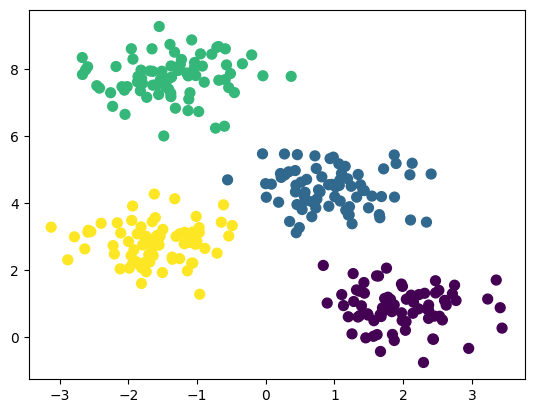

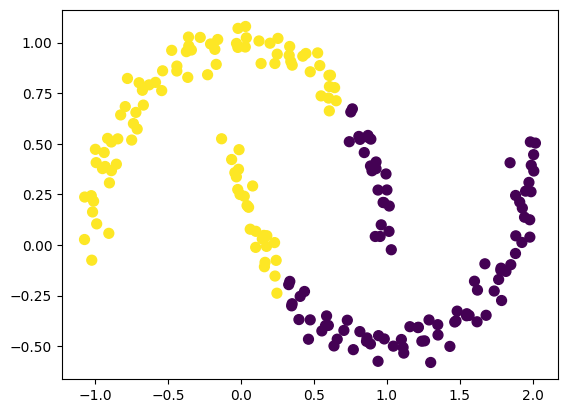

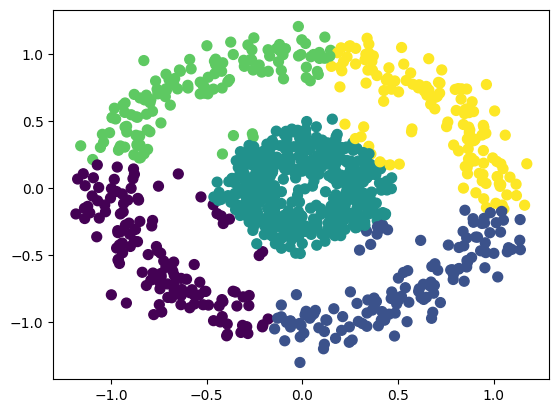

In [19]:
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=300, centers=4,
                  cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.show()

X, _ = make_moons(200, noise=.05, random_state=0)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.show()

X,_ = make_circles(n_samples=1000, factor=0.3, noise=0.1)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.show()

O algorytmie k-średnich często mówi się, że wykrywa skupiska sferyczne.
```
from helpers import get_quasispherical_data
X = get_quasispherical_data()```

Sprawdź tę hipotezę na podanych trudniejszych danych sferycznych (no właśnie czy są one sferyczne?). Czy nawet gdyby wybrać centroidy jako prawdziwe centra skupisk, otrzymalibyśmy prawidłowe grupowanie? Dlaczego?

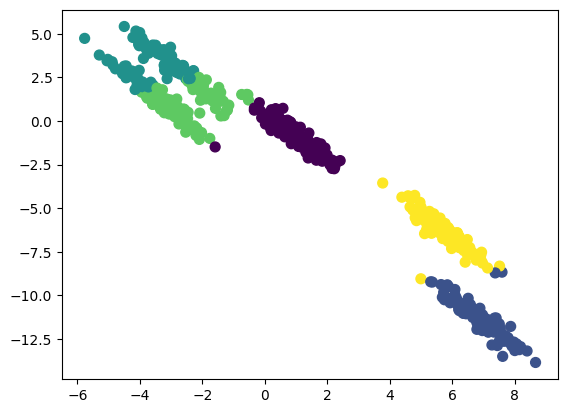

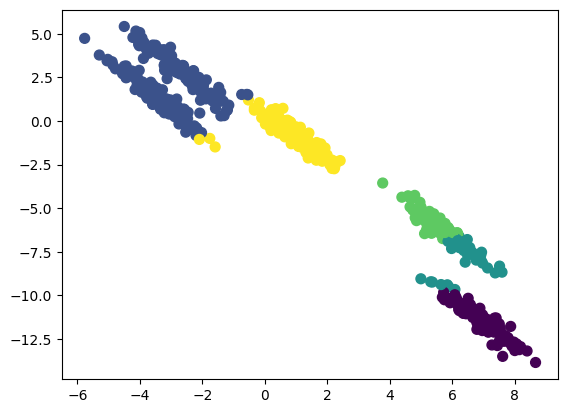

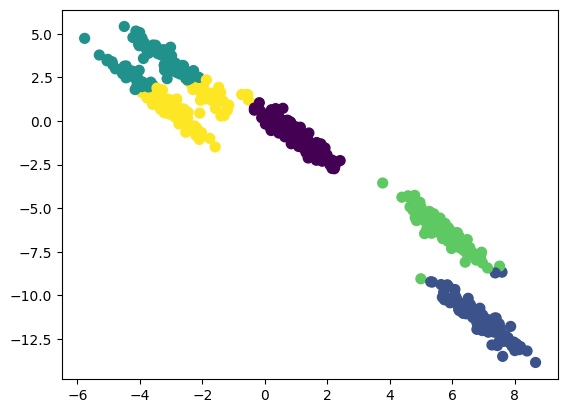

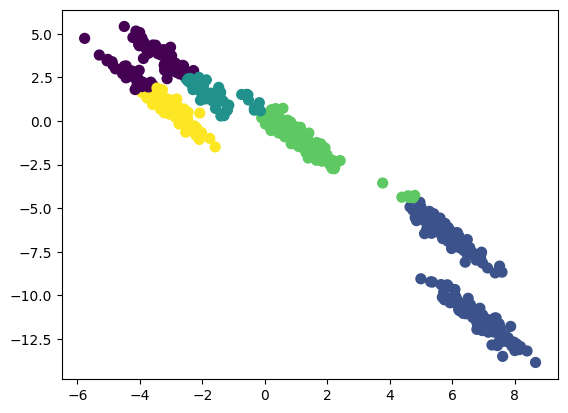

In [23]:
from helpers import get_quasispherical_data

X = get_quasispherical_data()

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.show()

labels = find_clusters(X, 5)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.show()

labels = find_clusters(X, 5)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.show()

labels = find_clusters(X, 5)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.show()



TODO: Odpowiedz na powyższe pytanie

**Ćwiczenia**
- Uruchom swój algorytm kilka razy - czy za każdym razem dostajesz ten sam wynik? Co ci to mówi o specyfice rozwiązowanego problemu i algortmie k-średnich jako algorytmie optymalizacyjnym?
- Twój algorytm uruchamiałeś z apriori znaną liczbą grup $k=4$, przetestuj działanie algorytmu dla $k=5$. Uruchom swój algorytm kilka razy - czy za każdym razem dostajesz ten sam wynik? Co ci to mówi o algortmie k-średnich jako algorytmie optymalizacyjnym?
- Jak w praktyce możemy próbować choć trochę ograniczyć problem algorytmu dot. utykania w minimach lokalnych?

TODO: Odpowiedz na ostatnie pytanie

W praktyce można upewnić się że zaczynamy z losowych centroid, a następnie wielokrotnie inicjować algorytm, lub zapewnić jakąś heurystykę do generowania lepszych rozwiązań startowych, tak aby pominąć część optimów lokalnych.
Można też zmieniać parametr k, ilości klastrów, jeśli nie zależy nam na podziale na konkretnie ileś klastrów.

## Zadanie 2 - parametry wielowymiarowego rozkładu normalnego

Poniższy kod służy do rysowania dwuwymiarowego rozkładu normalnego o wektorze średnich $[0,0]$ i macierzy kowariancji równej $[[1, 0], [0, 1]]$

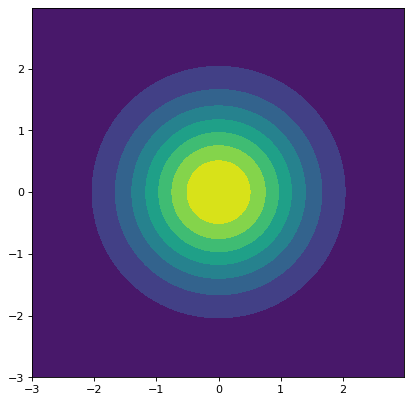

In [24]:
from scipy.stats import multivariate_normal
from matplotlib.pyplot import figure

figure(figsize=(6, 6), dpi=80)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
points = np.dstack((x, y))
normal = multivariate_normal([0, 0], [[1, 0], [0, 1]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmienisz wektor średnich  na np. $[1,0]$


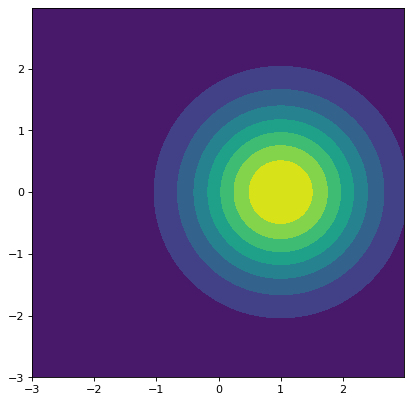

In [26]:
figure(figsize=(6, 6), dpi=80)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
points = np.dstack((x, y))
normal = multivariate_normal([1, 0], [[1, 0], [0, 1]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmodyfikujesz macierz kowariancji na wielokrotność macierzy jednostkowej. (Warto wrócić do oryginalnego ustawienia wektora średnich, aby wycentrować wykres)

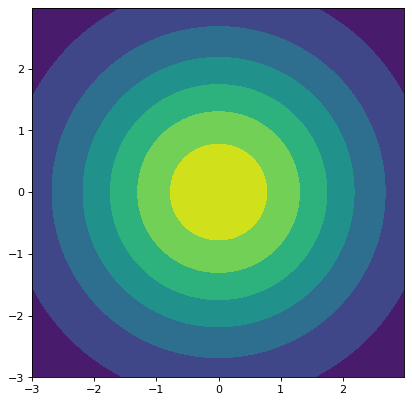

In [27]:
figure(figsize=(6, 6), dpi=80)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
points = np.dstack((x, y))
normal = multivariate_normal([0, 0], [[3, 0], [0, 3]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmodyfikujesz macierz kowariancji na inną macierz diagonalną

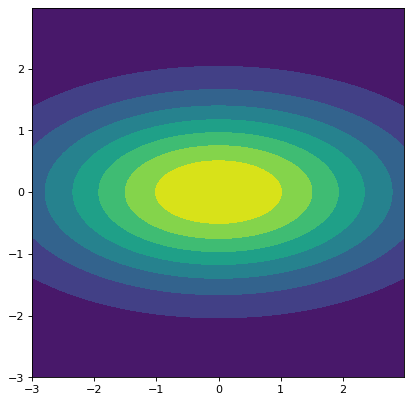

In [30]:
figure(figsize=(6, 6), dpi=80)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
points = np.dstack((x, y))
normal = multivariate_normal([0, 0], [[4, 0], [0, 1]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmodyfikujesz macierz kowariancji na inną macierz symetryczną np. $[[1, 0.9], [0.9, 1]]$

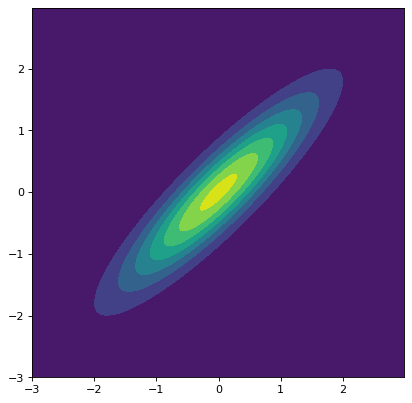

In [31]:
figure(figsize=(6, 6), dpi=80)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
points = np.dstack((x, y))
normal = multivariate_normal([0, 0], [[1, 0.9], [0.9, 1]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

Macierz kowariancji musi być symetryczna, jednak sama własność symetryczności macierzy nie wystarcza. Spróbuj zwizualizować rozkład o macierzy $[[1, 1], [1, 1]]$. Dlaczego nie jest to możliwe? Wyjaśnij używając zarówno formalizmu matematycznego jak i intuicji. (Jak wyglądałby wykres takiego rozkładu?)

In [37]:
figure(figsize=(6, 6), dpi=80)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
points = np.dstack((x, y))
normal = multivariate_normal([0, 0], [[1, 1], [1, 1]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

# Wyjaśnienie intuicyjne jest takie, że oznaczałoby to pełną korelację zmiennych,
# a więc wykres byłby wzdłóż prostej x=y, a więc następuje utrata jednego wymiaru
# i nie będzie to już rozkład na płaszczyźnie, a na linii

# Nie będzie możliwa wizualizacja dla jednostkowej macierzy kowariancji,
# ponieważ jej wyznacznik jest równy 0,
# a więc nie istnieje odwrotność macierzy


LinAlgError: When `allow_singular is False`, the input matrix must be symmetric positive definite.

<Figure size 480x480 with 0 Axes>

Korzystając z funkcji `multivariate_normal`, zwizualizuj mieszaninę dwóch rozkładów normalnych:
$$P(x) = \tau N(x; \mu_1, \Sigma_1) + (1-\tau) N(x; \mu_2, \Sigma_2) $$

In [40]:
from scipy.stats import multivariate_normal

# google colab slider
import ipywidgets as widgets
from IPython.display import display

tau = 0.9 # parametr, waga pierwszego rozkładu

mu1 = [0, 0]
sigma1 = [[1, 0], [0, 1]]

mu2 = [2, 2]
sigma2 = [[1, -0.5], [-0.5, 1]]

x, y = np.mgrid[-3:6:.01, -3:6:.01]
pos = np.dstack((x, y))

def plot_mixture(tau):
    rv1 = multivariate_normal(mu1, sigma1)
    rv2 = multivariate_normal(mu2, sigma2)
    density = tau * rv1.pdf(pos) + (1 - tau) * rv2.pdf(pos)

    plt.figure(figsize=(8, 6))
    plt.contourf(x, y, density, cmap='viridis')
    plt.title(f'Mieszanina dwóch rozkładów normalnych (tau={tau:.2f})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.colorbar(label='Gęstość')
    plt.axis('equal')
    plt.show()

# Suwak
tau_slider = widgets.FloatSlider(value=0.9, min=0, max=1, step=0.01, description='tau')
widgets.interact(plot_mixture, tau=tau_slider);


interactive(children=(FloatSlider(value=0.9, description='tau', max=1.0, step=0.01), Output()), _dom_classes=(…

**Ćwiczenia**
1. Poeksperymentuj z różnymi ustawieniami mieszaniny. Na co wpływa parametr $\tau$?
2. Rozważając mieszaninę rozkładów normalnych o dowolnej liczbie komponentów - czy istnieją rozkłady, których nie można zamodelować? Odpowiedź uzasadnij używając zdobytych intuicji.

TODO: Odpowiedz na pytania

1. tau wpływa na "wagę" z jaką brany jest pierwszy rozkład względem drugiego.  
Przypadki graniczne, takie jak 1 i 0 sprawią że jeden z rozkładów nie będzie brany pod uwagę

2. Można przybliżać dowolne funkcje, ale z pewną dokładnością. Może okazać się że odwzorowanie jakiejś funkcji w tej sposób będzie w praktyce niemożliwe aby zrobić to 100% dokładnie, jednak w znacznej większości przypadków powinno udać się zrobić to wystarczająco dobrze (z zaniedbywalnym błędem).

## Zadanie 3 - EM dla mieszaniny jednowymiarowej
Dane są dane wygenerowane z poniższej mieszaniny rozkładów normalnych:

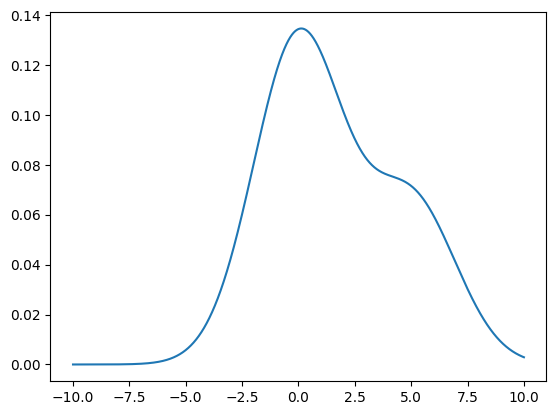

In [42]:
from scipy.stats import norm

x_axis = np.arange(-10, 10, 0.001)
plt.plot(x_axis, 0.66 * norm.pdf(x_axis, 0, 2) + 0.33 * norm.pdf(x_axis, 5, 2))
plt.show()

data = np.concatenate((np.random.normal(0, 2, 66), np.random.normal(5, 2, 33)))

Zwizualizuj dane na histogramie. Zwróć uwagę, że dobór odpowiednich $\mu_1, \mu_2, \sigma_1, \sigma_2$ na podstawie danych nie jest oczywisty

(array([ 1.,  5., 10., 16., 21., 11., 13., 12.,  7.,  3.]),
 array([-5.18213895, -3.8448844 , -2.50762985, -1.1703753 ,  0.16687925,
         1.5041338 ,  2.84138835,  4.1786429 ,  5.51589745,  6.85315201,
         8.19040656]),
 <BarContainer object of 10 artists>)

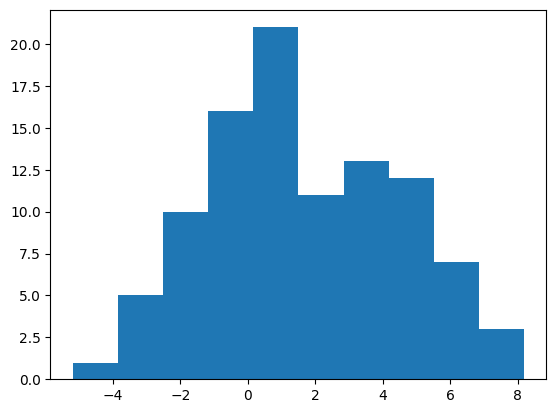

In [43]:
plt.hist(data)

Zaimplementuj algorytm EM dla powyższego problemu. Zwizualizuj kolejne kroki algorytmu (tj. narysuj wykres mikstury co kilka iteracji)

In [60]:
n_iter = 20
n_components = 2


tau = np.array([0.5, 0.5])             # wagi mieszaniny
mu = np.random.choice(data, n_components)  # średnie
sigma = np.full(n_components, 1.0)     # odchylenia standardowe

x_axis = np.linspace(-10, 10, 1000)

# Algorytm EM
for iteration in range(n_iter):
    # Krok E: wyznaczanie odpowiedzialności (gamma)
    gamma = np.zeros((len(data), n_components))
    for j in range(n_components):
        gamma[:, j] = tau[j] * norm.pdf(data, mu[j], sigma[j])
    gamma /= gamma.sum(axis=1, keepdims=True)

    # Krok M: aktualizacja parametrów
    N_k = gamma.sum(axis=0)
    for j in range(n_components):
        mu[j] = np.sum(gamma[:, j] * data) / N_k[j]
        sigma[j] = np.sqrt(np.sum(gamma[:, j] * (data - mu[j])**2) / N_k[j])
        tau[j] = N_k[j] / len(data)

    # Co kilka iteracji pokaż postęp
    if iteration in [0, 1, 2, 5, 10, 19]:
      print(f"===krok {iteration}===")
      for j in range(n_components):
        print(f"Składnik {j+1}: μ = {mu[j]:.2f}, σ = {sigma[j]:.2f}, τ = {tau[j]:.2f}")
        # plot - show # todo later

# Finalne parametry
print("Końcowe parametry:")
for j in range(n_components):
    print(f"Składnik {j+1}: μ = {mu[j]:.2f}, σ = {sigma[j]:.2f}, τ = {tau[j]:.2f}")

===krok 0===
Składnik 1: μ = 1.09, σ = 2.38, τ = 0.90
Składnik 2: μ = 6.28, σ = 1.13, τ = 0.10
===krok 1===
Składnik 1: μ = 1.15, σ = 2.45, τ = 0.90
Składnik 2: μ = 6.08, σ = 1.20, τ = 0.10
===krok 2===
Składnik 1: μ = 1.17, σ = 2.48, τ = 0.90
Składnik 2: μ = 5.95, σ = 1.26, τ = 0.10
===krok 5===
Składnik 1: μ = 1.18, σ = 2.52, τ = 0.90
Składnik 2: μ = 5.70, σ = 1.35, τ = 0.10
===krok 10===
Składnik 1: μ = 1.13, σ = 2.51, τ = 0.89
Składnik 2: μ = 5.51, σ = 1.41, τ = 0.11
===krok 19===
Składnik 1: μ = 1.03, σ = 2.46, τ = 0.86
Składnik 2: μ = 5.35, σ = 1.46, τ = 0.14
Końcowe parametry:
Składnik 1: μ = 1.03, σ = 2.46, τ = 0.86
Składnik 2: μ = 5.35, σ = 1.46, τ = 0.14


Skorzystaj z gotowej implementacji EM-GMM w pakiecie `sklearn` dla danych z elipsami:
```
from helpers import get_quasispherical_data
X = get_quasispherical_data()
```

Czy algorytm EM lepiej poradził sobie z tymi danymi niż k-Means?

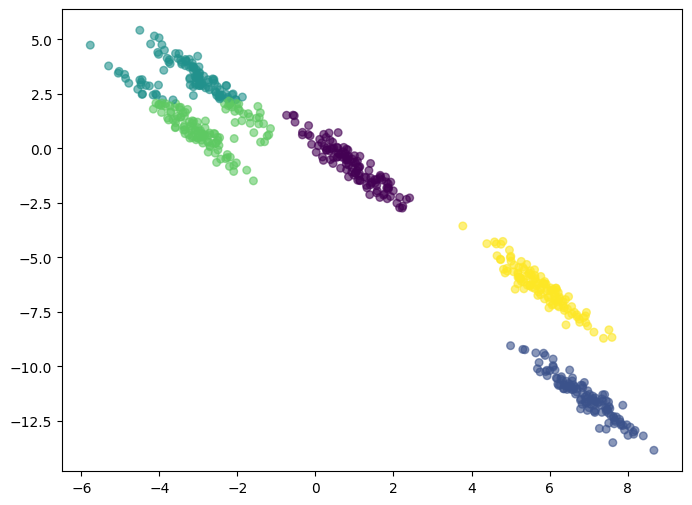

In [63]:
from sklearn.mixture import GaussianMixture

X = get_quasispherical_data()

gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)

Wykonaj proces strojenia parametru $K$ metody EM-GMM poprzez narysowanie wykresu funkcji wiarygodności dla różnych $K$ na zbiorze uczącym i testowym. Sprawdź czy wybrana liczba elementów mikstury odpowiada intuicji.

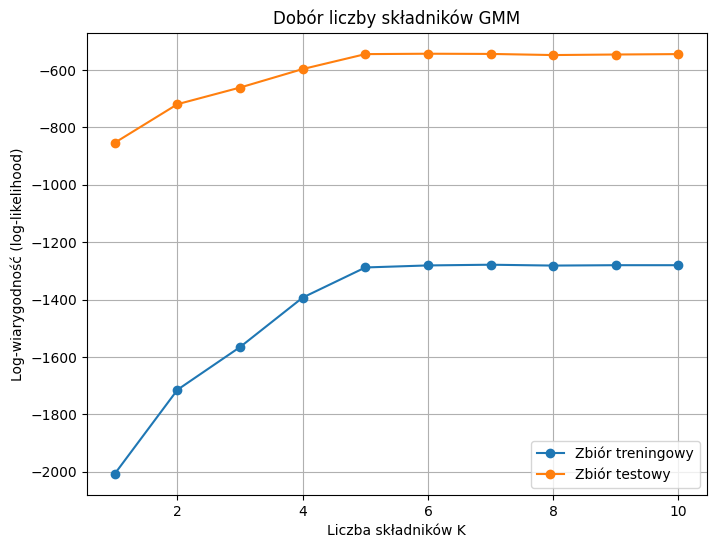

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

ks = range(1, 11)
train_ll = []
test_ll = []

for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X_train)
    train_ll.append(gmm.score(X_train) * len(X_train))  # suma log-likelihoodów
    test_ll.append(gmm.score(X_test) * len(X_test))     # suma log-likelihoodów

# Wykres
plt.figure(figsize=(8, 6))
plt.plot(ks, train_ll, marker='o', label='Zbiór treningowy')
plt.plot(ks, test_ll, marker='o', label='Zbiór testowy')
plt.xlabel('Liczba składników K')
plt.ylabel('Log-wiarygodność (log-likelihood)')
plt.title('Dobór liczby składników GMM')
plt.legend()
plt.grid(True)
plt.show()


Tak, liczba składników odpowiada intuicji, patrząc na to że wykresy wiarygodności ulegają wypłaszczeniu przy k>=5